<a href="https://colab.research.google.com/github/SriRamK345/RetailSalses_Forecast/blob/main/Sales_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.ensemble import RandomForestRegressor

### Loading datasets

In [4]:
df_store = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/stores_data_set.csv")
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df_sales = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/sales_data_set.csv")
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
df_feature = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/Features_data_set.csv")
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
df_store.shape

(45, 3)

In [8]:
df_store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [9]:
df_sales.shape

(421570, 5)

In [10]:
df_sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [11]:
df_feature.shape

(8190, 12)

In [12]:
df_feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

### Combining Datasets

In [13]:
merged_df = pd.merge(df_store, df_sales, on='Store', how='outer')
merged_df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,05/02/2010,24924.50,False
1,1,A,151315,1,12/02/2010,46039.49,True
2,1,A,151315,1,19/02/2010,41595.55,False
3,1,A,151315,1,26/02/2010,19403.54,False
4,1,A,151315,1,05/03/2010,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,False
421566,45,B,118221,98,05/10/2012,628.10,False
421567,45,B,118221,98,12/10/2012,1061.02,False
421568,45,B,118221,98,19/10/2012,760.01,False


In [14]:
merged_df.shape

(421570, 7)

In [15]:
merged_df.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [16]:
df = pd.merge(merged_df, df_feature, on=['Store','Date'], how='outer')
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [17]:
# df.set_index('Date', inplace=True)
# df.head()

In [18]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (423325, 17)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  float64
 3   Dept          421570 non-null  float64
 4   Date          423325 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday_x   421570 non-null  object 
 7   Temperature   423325 non-null  float64
 8   Fuel_Price    423325 non-null  float64
 9   MarkDown1     152433 non-null  float64
 10  MarkDown2     112532 non-null  float64
 11  MarkDown3     138658 non-null  float64
 12  MarkDown4     136466 non-null  float64
 13  MarkDown5     153187 non-null  float64
 14  CPI           422740 non-null  float64
 15  Unemployment  422740 non-null  float64
 16  IsHoliday_y   423325 non-null  bool   
dtypes: bool(1), float64(12), int64(1), object(3)
mem

In [20]:
df.isnull().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday_x       1755
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday_y          0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

### Preparation for Exploratory Data Analysis(EDA)

In [23]:
df.IsHoliday_x.value_counts()

IsHoliday_x
False    391909
True      29661
Name: count, dtype: int64

In [24]:
df.IsHoliday_y.value_counts()

IsHoliday_y
False    393529
True      29796
Name: count, dtype: int64

In [25]:
df= df.drop(columns=['IsHoliday_x'])

# Replace column name
df.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315.0,1.0,05/02/2010,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [26]:
# check negative weekly_sales count
df[df['Weekly_Sales']<=0]

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
188,1,A,151315.0,47.0,19/02/2010,-863.00,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
406,1,A,151315.0,47.0,12/03/2010,-698.00,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
2549,1,A,151315.0,47.0,08/10/2010,-58.00,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,False
3632,1,A,151315.0,54.0,21/01/2011,-50.00,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,False
4132,1,A,151315.0,47.0,11/03/2011,0.00,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,B,118221.0,49.0,25/05/2012,-4.97,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,False
420403,45,B,118221.0,49.0,29/06/2012,-34.00,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,False
420736,45,B,118221.0,49.0,03/08/2012,-1.91,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,False
421007,45,B,118221.0,54.0,31/08/2012,0.00,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False


In [27]:
len(df[df['Weekly_Sales']<=0])

1358

In [28]:
# negative weekly_sales value convert to null value

df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x: np.nan if x<=0 else x)
df.tail()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
423320,45,NaN,NaN,NaN,28/06/2013,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
423321,45,NaN,NaN,NaN,05/07/2013,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
423322,45,NaN,NaN,NaN,12/07/2013,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
423323,45,NaN,NaN,NaN,19/07/2013,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
423324,45,NaN,NaN,NaN,26/07/2013,NaN,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [29]:
len(df.MarkDown1.unique())

4024

### Missing Values

In [30]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
Store,0
Type,1755
Size,1755
Dept,1755
Date,0
Weekly_Sales,3113
Temperature,0
Fuel_Price,0
MarkDown1,270892
MarkDown2,310793


### Unique Values

In [31]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Store,45
Type,3
Size,40
Dept,81
Date,182
Weekly_Sales,358785
Temperature,4178
Fuel_Price,1011
MarkDown1,4023
MarkDown2,2715


In [32]:
df["Dept"].value_counts()

Dept
1.0     6435
16.0    6435
92.0    6435
38.0    6435
40.0    6435
        ... 
78.0     235
77.0     150
65.0     143
39.0      16
43.0      12
Name: count, Length: 81, dtype: int64

### Separating columns (Numeric or Categorical)

In [33]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315.0,1.0,05/02/2010,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [34]:
numeric_columns = ["Weekly_Sales", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3",  "MarkDown4", "MarkDown5", "CPI", "Unemployment"]
category_columns = ["Store",  "Type", "Size","IsHoliday", "Dept"]

In [35]:
numeric_columns

['Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [36]:
string_columns = df.select_dtypes(exclude=['int64',"float64"]).columns
numeric_columns = df.select_dtypes(include=['int64',"float64"]).columns

In [37]:
string_columns

Index(['Type', 'Date', 'IsHoliday'], dtype='object')

In [38]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Store,423325.0,22.203860,12.786244,1.000,11.000000,22.000000,33.000000,45.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.000000,202505.000000,219622.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,420212.0,16033.114591,22729.492116,0.010,2120.130000,7661.700000,20271.265000,693099.360000
Temperature,423325.0,60.067140,18.452599,-7.290,46.670000,62.070000,74.260000,101.950000
Fuel_Price,423325.0,3.361933,0.458038,2.472,2.935000,3.452000,3.738000,4.468000
MarkDown1,152433.0,7246.604247,8319.906707,-2781.450,2230.800000,5336.520000,9210.900000,103184.980000
MarkDown2,112532.0,3337.597289,9461.265420,-265.760,42.000000,194.670000,1943.200000,104519.540000
MarkDown3,138658.0,1449.098932,9674.705234,-179.260,5.140000,24.830000,104.500000,149483.310000
MarkDown4,136466.0,3382.019834,6306.728468,0.220,500.910000,1465.540000,3592.000000,67474.850000


In [39]:
df.shape

(423325, 16)

In [40]:
df.IsHoliday.value_counts()

IsHoliday
False    393529
True      29796
Name: count, dtype: int64

In [41]:
# holiday_true_data = df[df['Holiday'] == 1]
# holiday_false_data = df[df['Holiday'] == 0]

In [42]:
print("Markdown1 =", df.MarkDown1.isnull().sum()/421570)
print("Markdown2 =", df.MarkDown2.isnull().sum()/421570)
print("Markdown3 =", df.MarkDown3.isnull().sum()/421570)
print("Markdown4 =", df.MarkDown4.isnull().sum()/421570)
print("Markdown5 =", df.MarkDown5.isnull().sum()/421570)

Markdown1 = 0.6425789311383637
Markdown2 = 0.737227506701141
Markdown3 = 0.6752544061484451
Markdown4 = 0.6804540171264558
Markdown5 = 0.6407903788220224


### Exploratory Data Analysis(EDA)

In [43]:
df.dropna(subset=['Type', 'Size', 'Dept', 'Weekly_Sales','CPI','Unemployment'], inplace=True)

In [44]:
def plot(df, column):

    sns.set_style("whitegrid") # Setting the style for seaborn

    plt.figure(figsize=(20, 5)) # Creating the figure with a specific size

    # Creating the first subplot for the box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}', fontsize=16,color ="red")
    plt.xlabel(f'{column}', fontsize=14, color = 'darkblue')
    plt.ylabel('Value', fontsize=14, color = 'darkblue')

    # Creating the second subplot for the distribution plot
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, bins=50, kde = True)
    plt.title(f'Distribution Plot for {column}', fontsize=16, color = 'red')
    plt.xlabel(f'{column}', fontsize=14, color = 'darkblue')
    plt.ylabel('Frequency', fontsize=14, color = 'darkblue')

    # Adjusting the layout
    plt.tight_layout()

    # Displaying the plots
    plt.show()

In [45]:
# for i in numeric_columns:
#   plot(df, i)

df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315.0,1.0,05/02/2010,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


### Analyzing Categorical Variables

In [61]:
category_columns

['Store', 'Type', 'Size', 'IsHoliday', 'Dept']

In [65]:
# encoding for catagorical features into numerical
df['IsHoliday'] = df['IsHoliday'].map({True:1, False:0})
df['Type'] = df['Type'].map({'A':1, 'B':2, 'C':3})

In [66]:
df[category_columns].corr()

,Store,Type,Size,IsHoliday,Dept
Store,1.000000,0.226352,-0.182763,-0.000522,0.024258
Type,0.226352,1.000000,-0.811541,-0.001000,0.003157
Size,-0.182763,-0.811541,1.000000,0.000797,-0.002491
IsHoliday,-0.000522,-0.001000,0.000797,1.000000,0.000663
Dept,0.024258,0.003157,-0.002491,0.000663,1.000000


In [47]:
len(df["Size"].value_counts())

40

In [48]:
len(df["Dept"].value_counts())

81

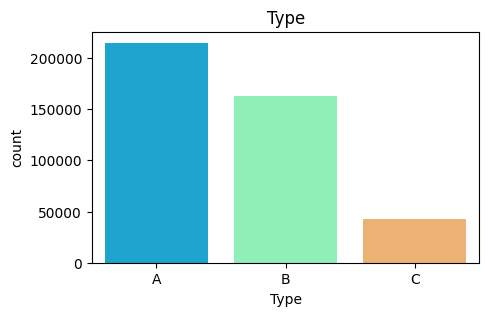

In [49]:
plt.figure(figsize = (5,3))
sns.countplot(x="Type", data = df, palette = "rainbow")
plt.title("Type")
plt.show()

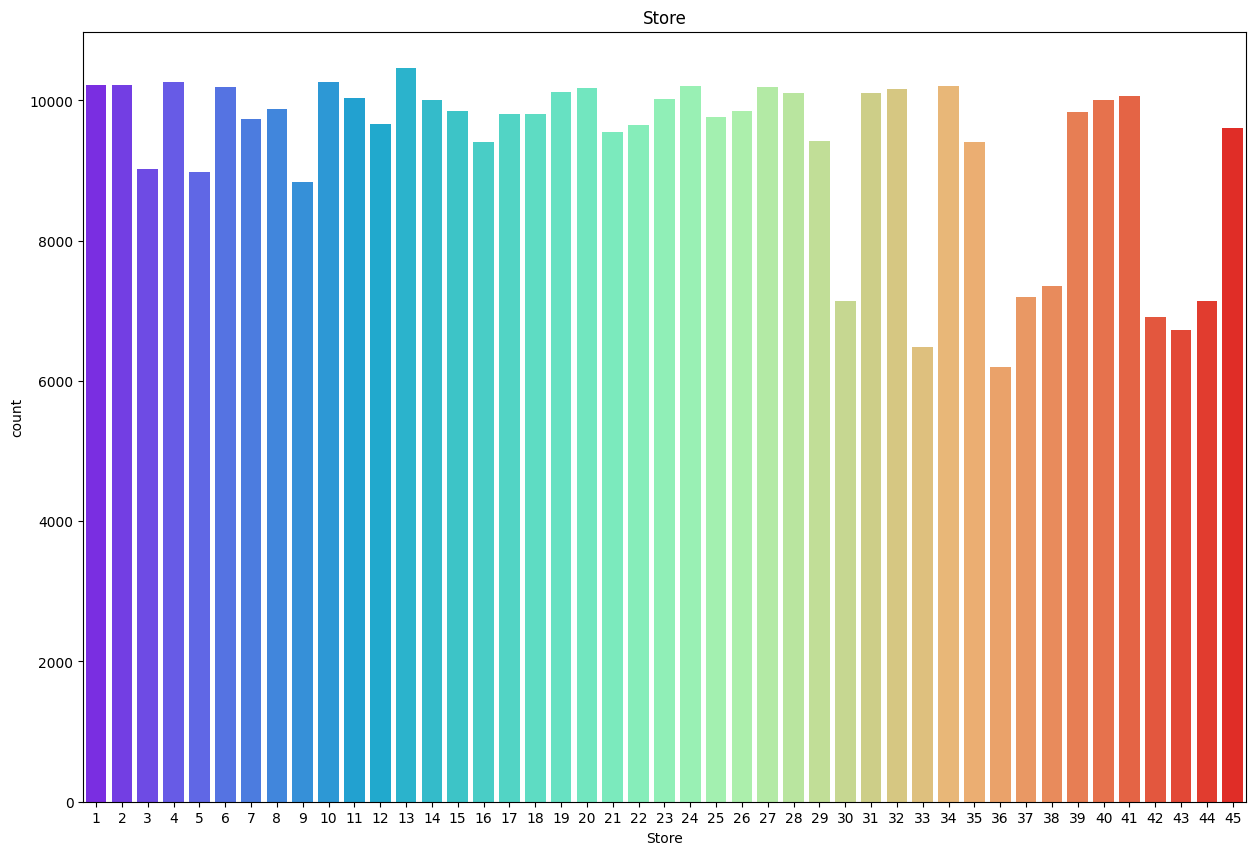

In [50]:
plt.figure(figsize = (15,10))
sns.countplot(x="Store", data = df, palette = "rainbow")
plt.title("Store")
plt.show()

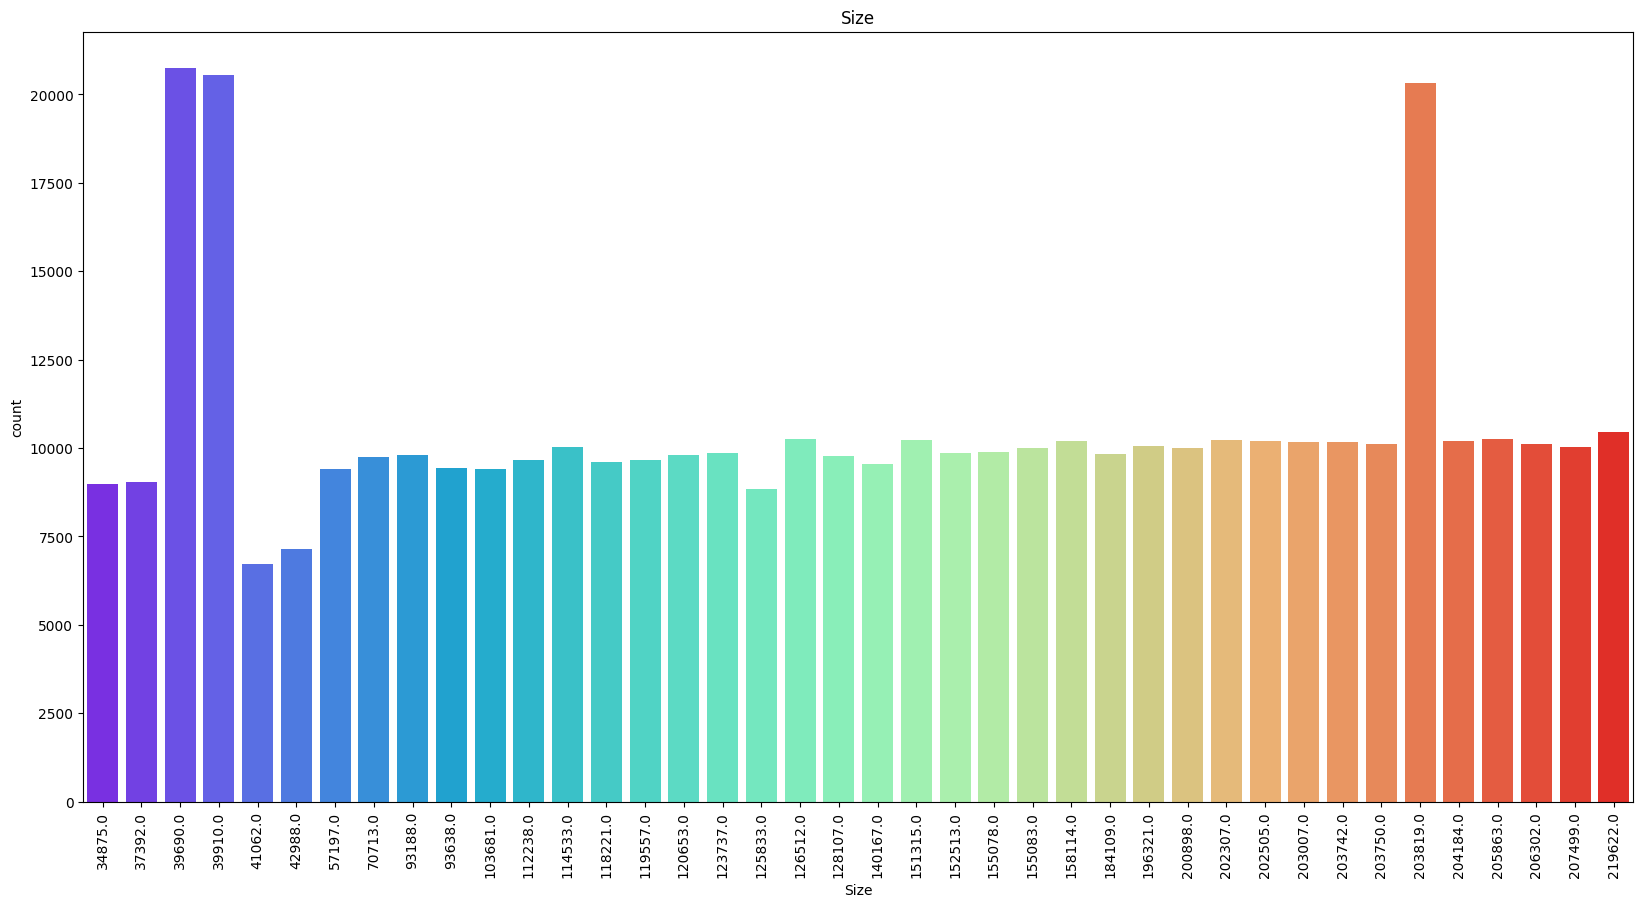

In [51]:
plt.figure(figsize = (20,10))
sns.countplot(x="Size", data = df, palette = "rainbow",)
plt.title("Size")
plt.xticks(rotation = 90)
plt.show()

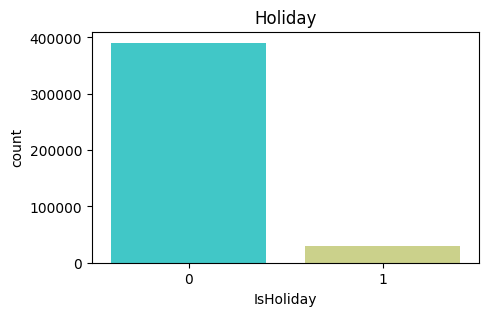

In [67]:
plt.figure(figsize = (5,3))
sns.countplot(x="IsHoliday", data = df, palette = "rainbow")
plt.title("Holiday")
plt.show()

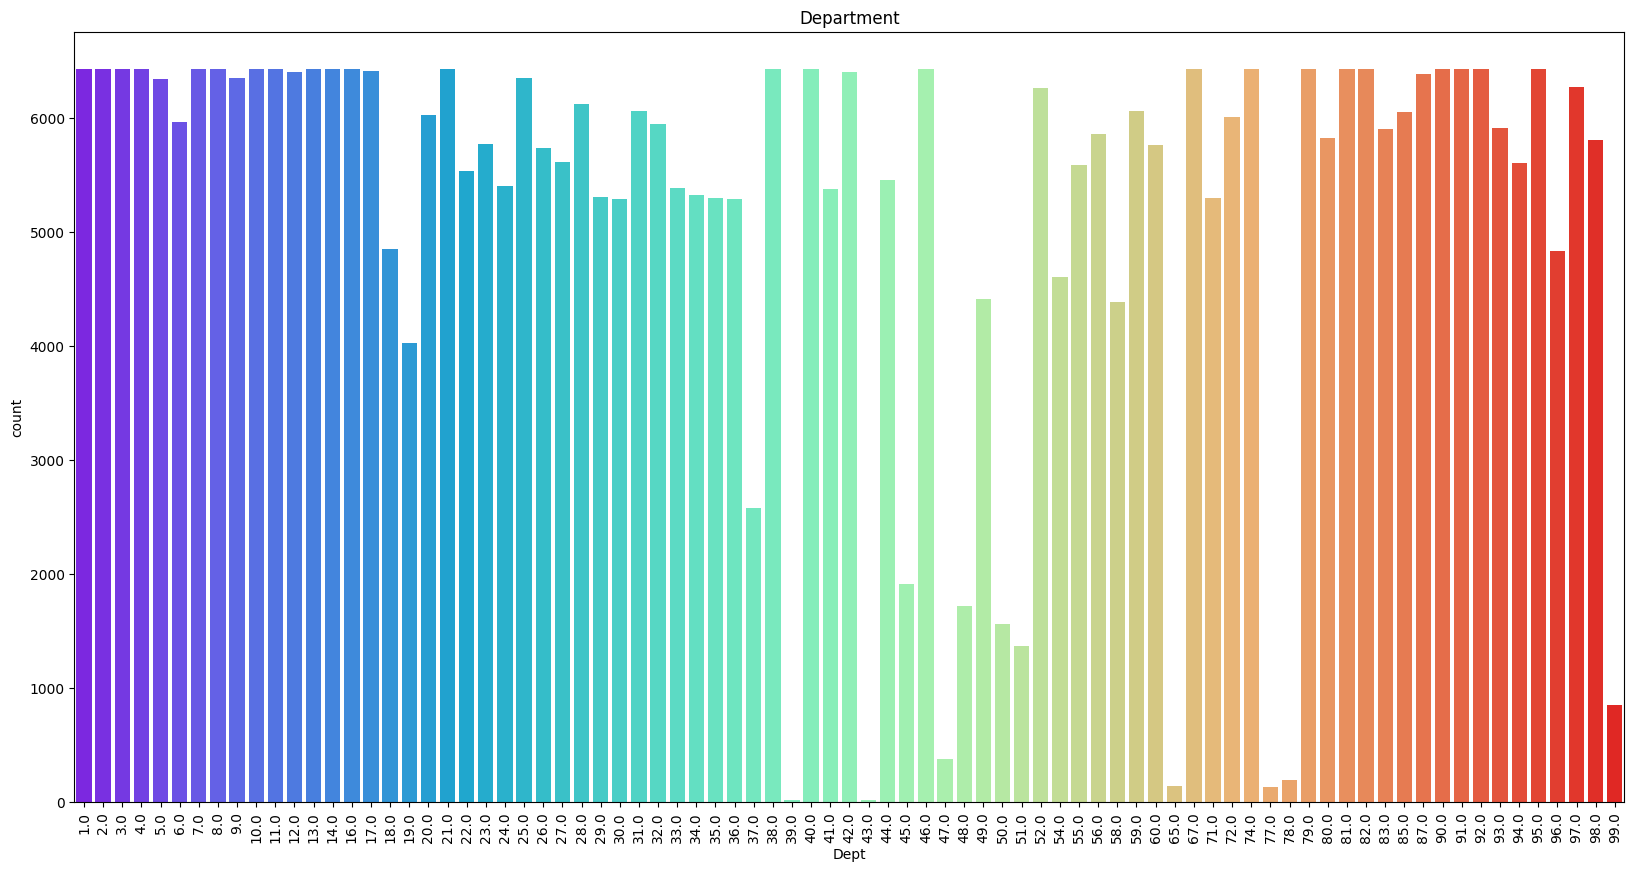

In [53]:
plt.figure(figsize = (20,10))
sns.countplot(x="Dept", data = df, palette = "rainbow")
plt.title("Department")
plt.xticks(rotation = 90)
plt.show()

### Bi-variate Analysis

In [54]:
numeric_columns

Index(['Store', 'Size', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')

In [64]:
df[numeric_columns].corr()

,Store,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,-0.182763,0.024258,-0.085117,-0.050230,0.065321,-0.119676,-0.034993,-0.031475,-0.009991,-0.026777,-0.211261,0.208759
Size,-0.182763,1.000000,-0.002491,0.244117,-0.058413,0.003632,0.345732,0.108843,0.048935,0.168266,0.304814,-0.003903,-0.068335
Dept,0.024258,-0.002491,1.000000,0.148749,0.004727,0.003544,-0.002512,0.000018,0.001855,0.004176,0.000295,-0.007178,0.007787
Weekly_Sales,-0.085117,0.244117,0.148749,1.000000,-0.002339,0.000089,0.085325,0.024565,0.060304,0.045325,0.090561,-0.021162,-0.025806
Temperature,-0.050230,-0.058413,0.004727,-0.002339,1.000000,0.143700,-0.040498,-0.323891,-0.096843,-0.063955,-0.017616,0.182223,0.096768
Fuel_Price,0.065321,0.003632,0.003544,0.000089,0.143700,1.000000,0.061302,-0.220680,-0.102146,-0.045033,-0.128017,-0.164199,-0.033915
MarkDown1,-0.119676,0.345732,-0.002512,0.085325,-0.040498,0.061302,1.000000,0.024601,-0.108189,0.819175,0.160412,-0.055522,0.050103
MarkDown2,-0.034993,0.108843,0.000018,0.024565,-0.323891,-0.220680,0.024601,1.000000,-0.050146,-0.007582,-0.007410,-0.039782,0.020839
MarkDown3,-0.031475,0.048935,0.001855,0.060304,-0.096843,-0.102146,-0.108189,-0.050146,1.000000,-0.071148,-0.026475,-0.023820,0.012866
MarkDown4,-0.009991,0.168266,0.004176,0.045325,-0.063955,-0.045033,0.819175,-0.007582,-0.071148,1.000000,0.107895,-0.049693,0.024919


In [ ]:
graph = sns.pairplot(df[numeric_columns], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

In [1]:
# graph = sns.pairplot(df[numeric_columns], diag_kind = "kde")
# plt.show()

In [ ]:
# Use 'col' and 'row' instead of 'x' and 'y'
sns.FacetGrid(col = 'Temperature', row = 'Weekly_Sales', data = df, palette = 'rainbow')
plt.show()

In [ ]:
sns.Facegrid

In [2]:
sns.lmplot(x = 'CPI', y = 'Weekly_Sales', data = df, palette = 'rainbow',)
plt.show()

NameError: name 'sns' is not defined

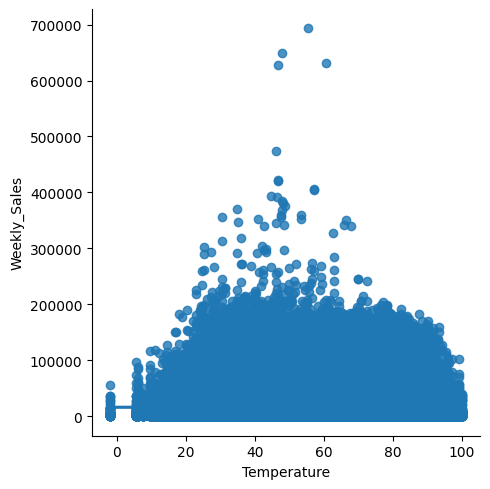

In [83]:
sns.lmplot(x = 'Temperature', y = 'Weekly_Sales', data = df, palette = 'rainbow',)
plt.show()

In [ ]:
sns.lmplot(x = 'Temperature', y = 'Weekly_Sales', data = df, palette = 'rainbow')
plt.show()

In [70]:
category_columns.append("Weekly_Sales")

In [ ]:
for i in category_columns:
  sns.countplot(x=i, data = df[category_columns], hue = "Weekly_Sales")

In [ ]:
category_columns.pop("Weekly_Sales")

In [ ]:
for i in numeric_columns:
    graph = sns.FacetGrid(df, hue = "Weekly_Sales", height = 5)
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    plt.tight_layout()

In [ ]:
# create 'markdown' column for --> all markdowns are null means 0, otherwise 1 (any one markdown have value)

df['Markdown'] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].notnull().any(axis=1).astype(int)
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Markdown
0,1,A,151315.0,1.0,05/02/2010,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,0
1,1,A,151315.0,2.0,05/02/2010,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,0
2,1,A,151315.0,3.0,05/02/2010,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,0
3,1,A,151315.0,4.0,05/02/2010,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,0
4,1,A,151315.0,5.0,05/02/2010,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,0


In [ ]:
# check weekly_sales average --> holiday(1) and non-holiday(0)
df.groupby('Markdown')['Weekly_Sales'].mean()

Markdown
0    15922.137810
1    16231.116041
Name: Weekly_Sales, dtype: float64

In [ ]:
# Reset the index of your DataFrame to ensure unique index values
#df = df.reset_index()
#
# for i in MarkDown:
#   plot(df, i)

In [ ]:
# df.set_index("Date")
# df.head()

In [ ]:
# # make Date feature into --> Day,Month,Year new features and drop Date column
df.Date=pd.to_datetime(df.Date, format="%d/%m/%Y")
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.drop(columns=['Date'])
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Markdown,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010


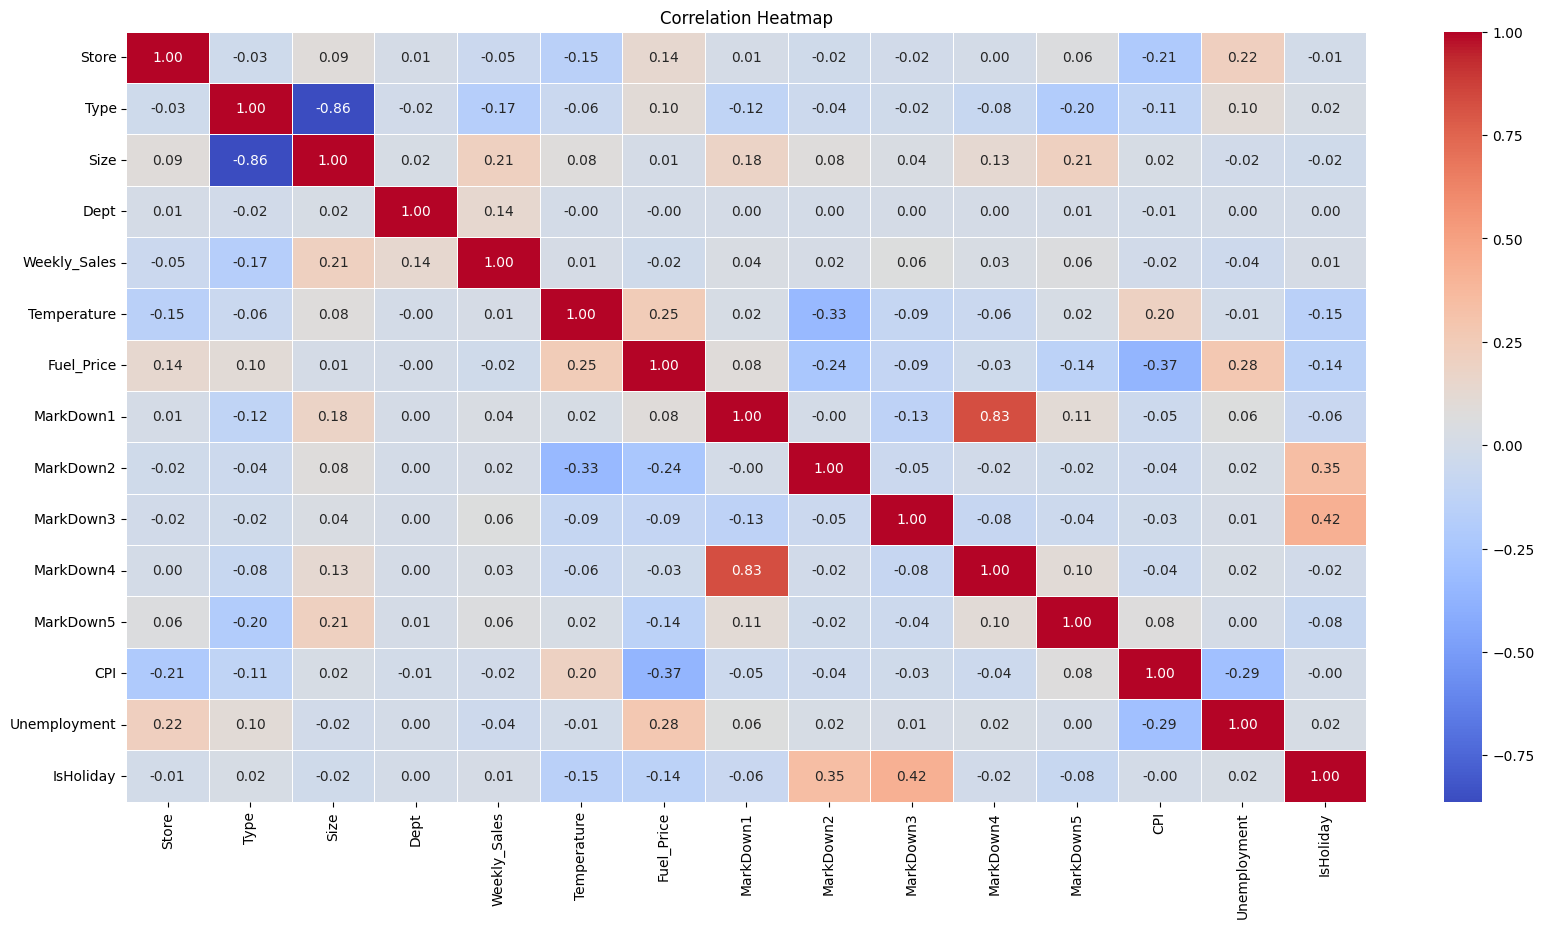

In [ ]:
# Calculate the correlation matrix
df_corr = df.drop(columns=['Day', 'Month', 'Year','Markdown']).dropna().corr()

plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# in heatmap shows 'Type' and 'Size' features have high correlaton and also relationship with weekly_sales.
# other features are weak correlation with weekly_sales.

In [ ]:
df2 = df.copy()
df2.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Markdown,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010


In [ ]:
# Replace null values with median

df2.MarkDown1.fillna(df2.MarkDown1.median(), inplace=True)
df2.MarkDown2.fillna(df2.MarkDown2.median(), inplace=True)
df2.MarkDown3.fillna(df2.MarkDown3.median(), inplace=True)
df2.MarkDown4.fillna(df2.MarkDown4.median(), inplace=True)
df2.MarkDown5.fillna(df2.MarkDown5.median(), inplace=True)

In [ ]:
for i in MarkDown:
  plot(df2, i)

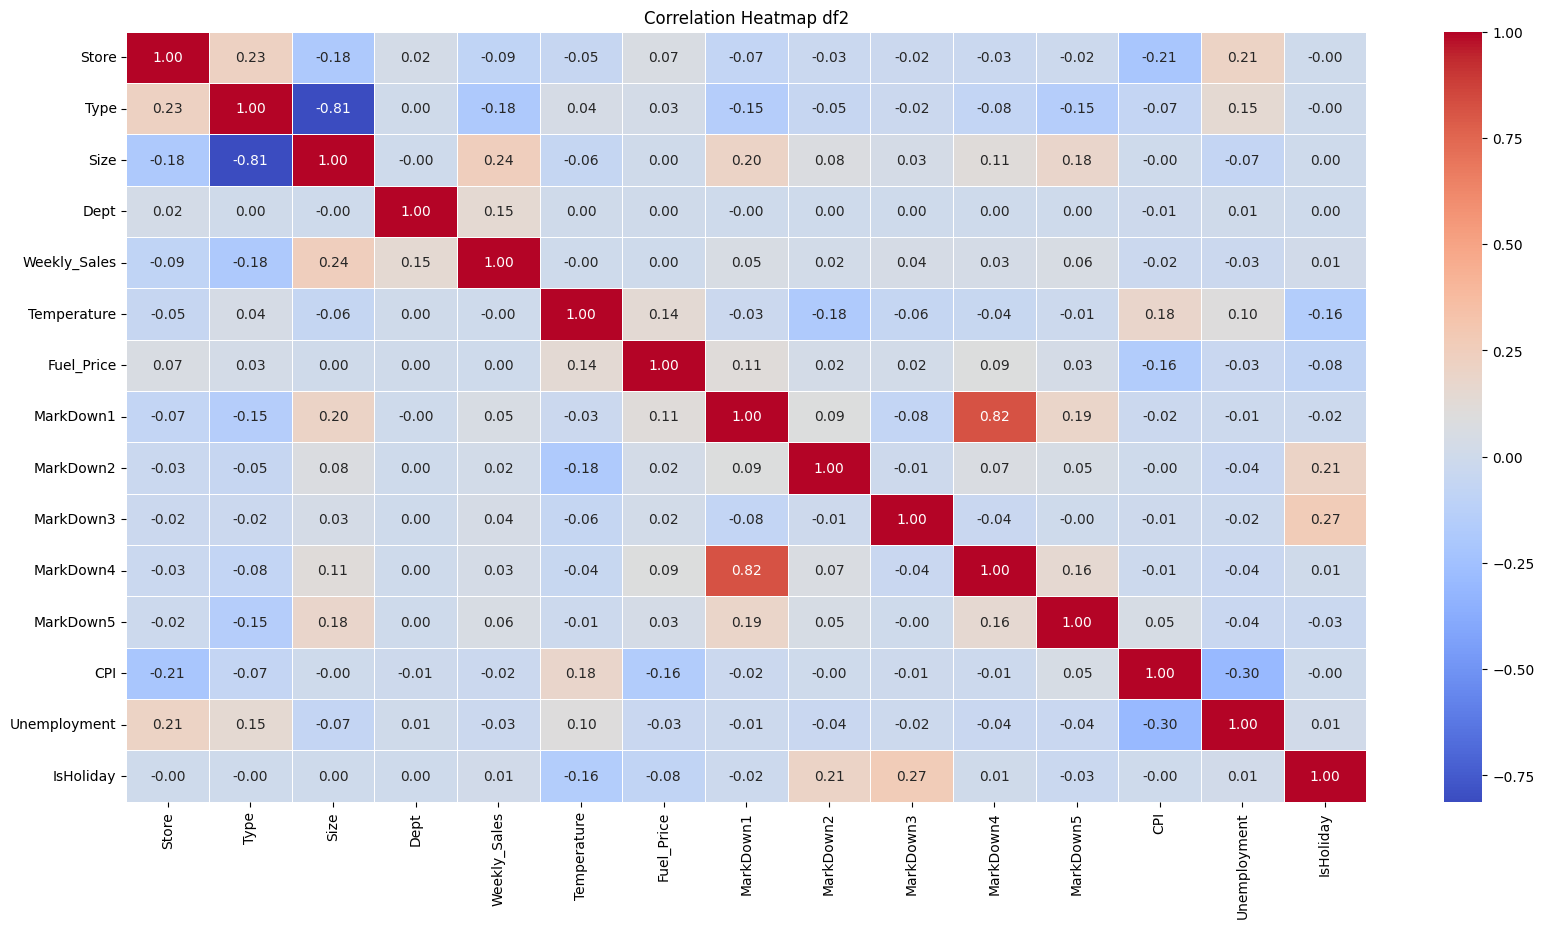

In [ ]:
# Calculate the correlation matrix
df2_corr = df2.drop(columns=['Day', 'Month', 'Year','Markdown']).dropna().corr()

plt.figure(figsize=(20,10))
sns.heatmap(df2_corr, annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap df2")
plt.show()

### Implementing ML techinique in df to predict null values in Markdown columns

In [ ]:
#Display columns with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:", null_columns)
MarkDown = ['MarkDown1', 'MarkDown2', 'MarkDown3',  'MarkDown4', 'MarkDown5']

Columns with null values: Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], dtype='object')


In [ ]:
# Features to use for prediction (all columns except the MarkDown columns)
features = ['Store', 'Type', 'Size', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']

for target in MarkDown:
    # Split the data into training and prediction sets for the current MarkDown column
    train_df = df[df[target].notnull()]
    predict_df = df[df[target].isnull()]

    # Features and target
    X_train = train_df[features]
    y_train = train_df[target]
    X_predict = predict_df[features]

    # Initialize the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict missing values
    predicted_values = model.predict(X_predict)

    # Fill the missing values in the original DataFrame
    df.loc[df[target].isnull(), target] = predicted_values

df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Markdown,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010


In [ ]:
# for i in numeric_columns:
#   plot(df, i)

In [ ]:
category_columns

['Store', 'Type', 'Size', 'IsHoliday', 'Dept']

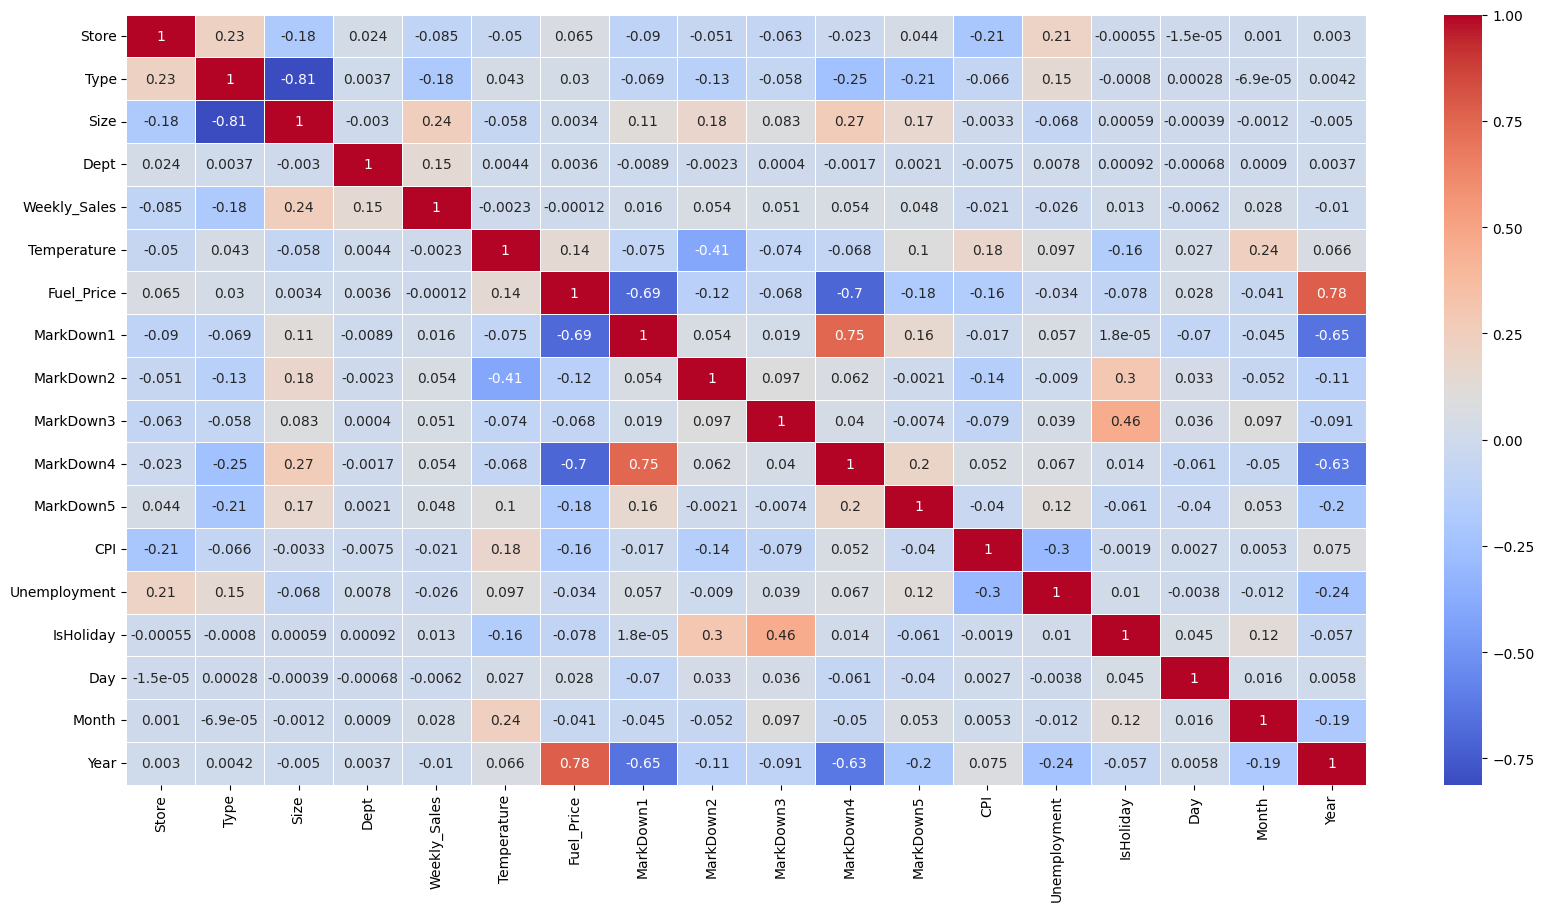

In [ ]:
# Calculate the correlation matrix
df_corr = df.drop(columns=['Day', 'Month', 'Year','Markdown']).dropna().corr()

plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# holiday_true_data = df[df['IsHoliday'] == 1]
# holiday_false_data = df[df['IsHoliday'] == 0]

In [ ]:
# plt.figure(figsize=(20,10))
# sns.heatmap(holiday_true_data.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
# plt.show()

In [ ]:
# plt.figure(figsize=(20,10))
# sns.heatmap(holiday_false_data.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
# plt.show()

([<matplotlib.patches.Wedge at 0x7885929f7a60>,
 [Text(-1.0732375816130062, 0.24116611166054355, '0'),
  Text(1.0732376041926026, -0.2411660111767879, '1')],
 [Text(-0.5854023172434579, 0.13154515181484192, '93.0%'),
  Text(0.5854023295596014, -0.13154509700552067, '7.0%')])

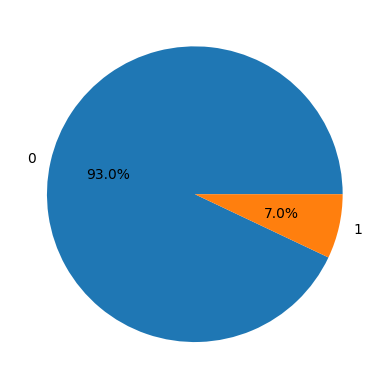

In [ ]:
plt.pie(df.IsHoliday.value_counts(), labels=df.IsHoliday.value_counts().index, autopct='%1.1f%%')

In [ ]:
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010


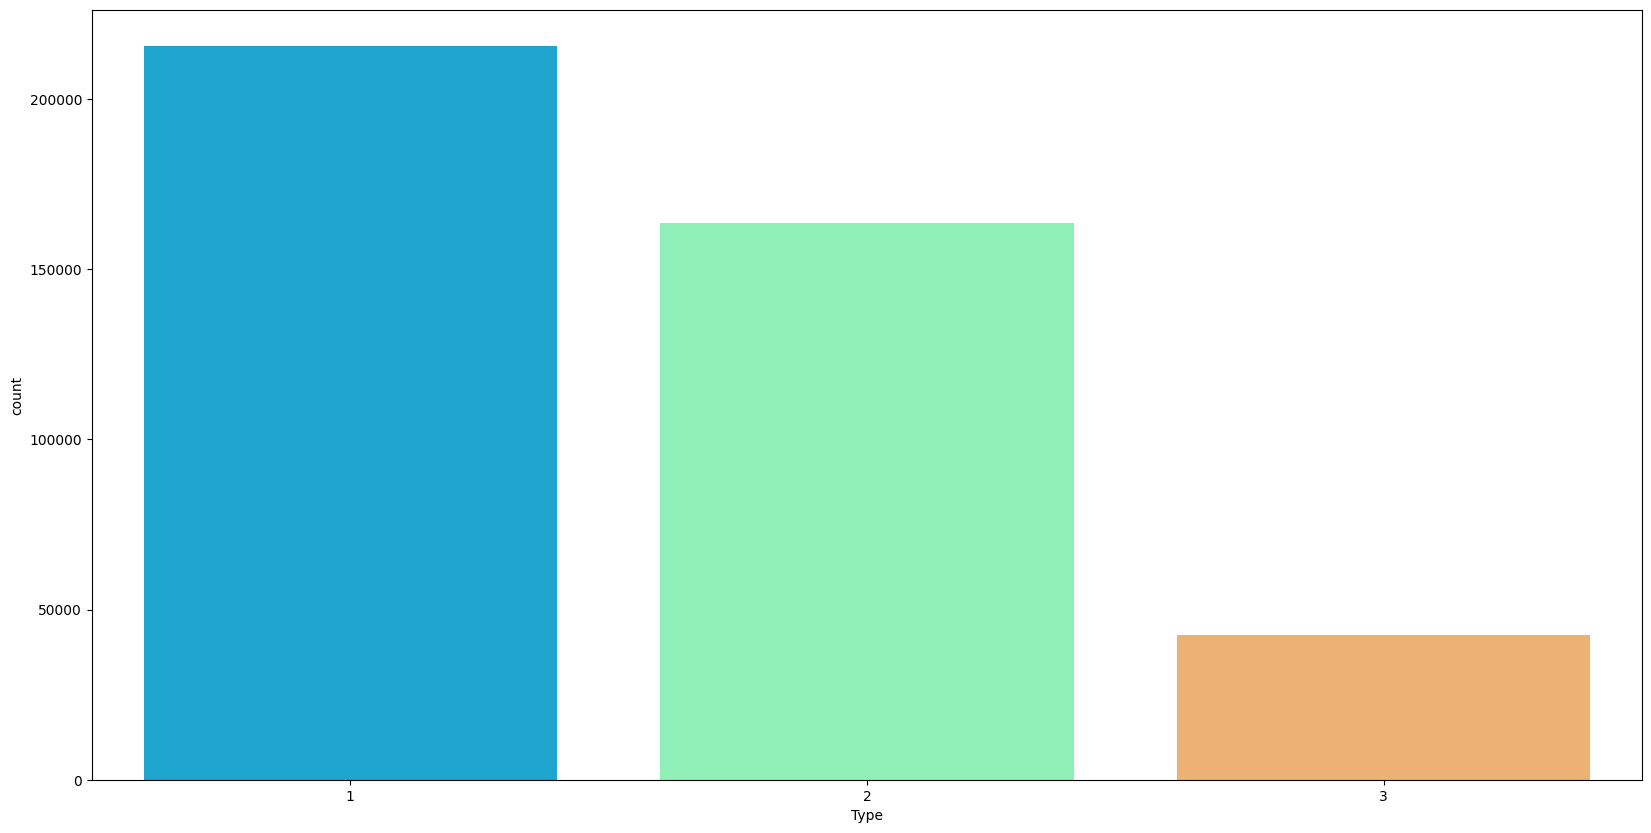

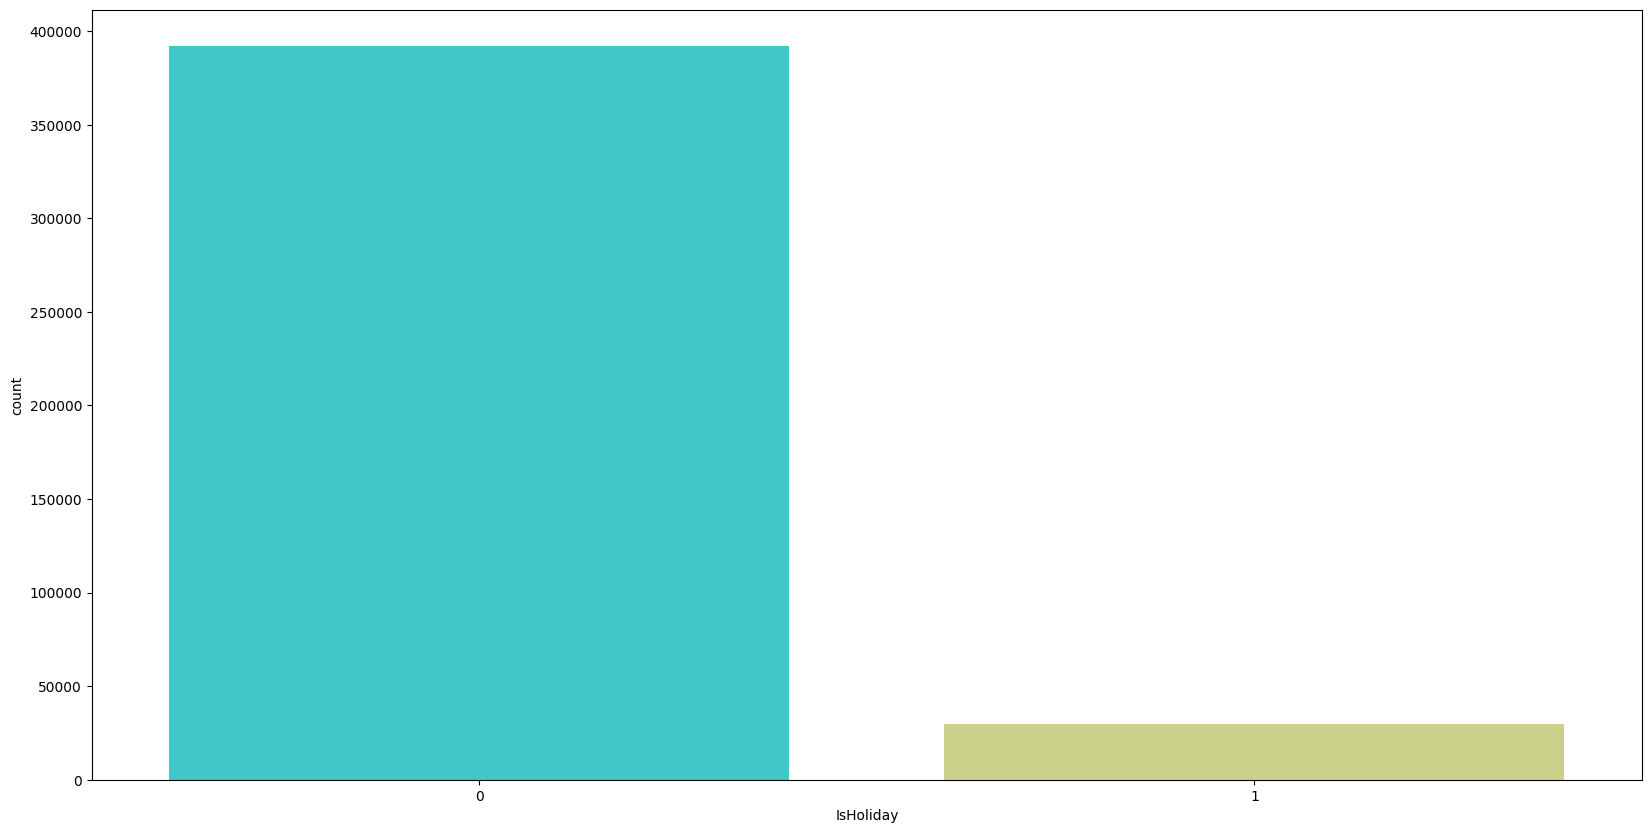

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x="IsHoliday", data = df, palette = "rainbow")
plt.show()

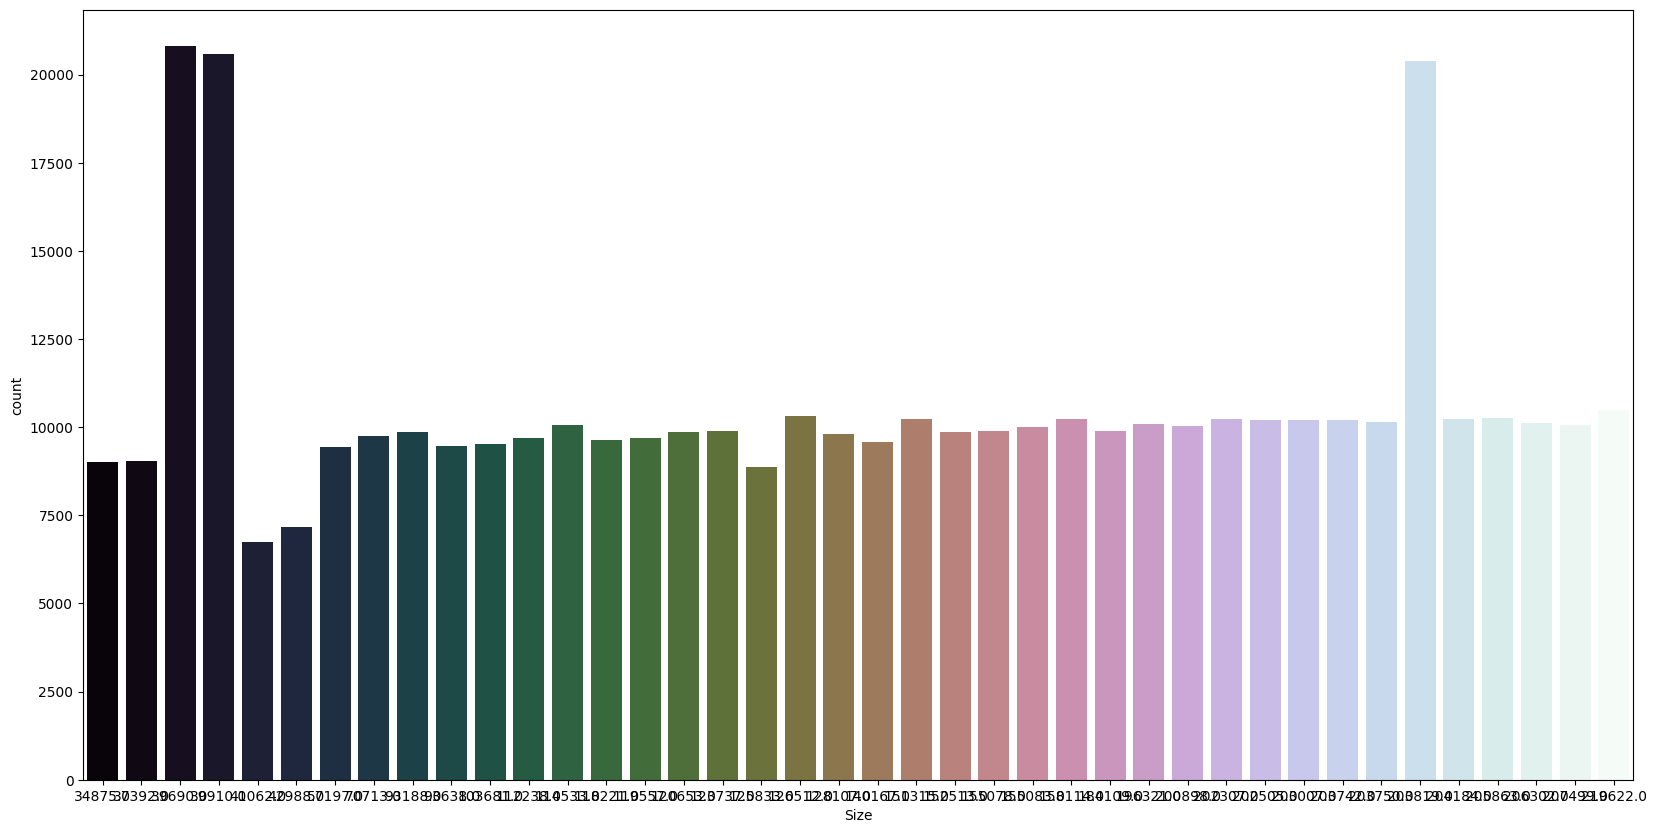

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x="Size", data = df, palette = "cubehelix",)
plt.show()

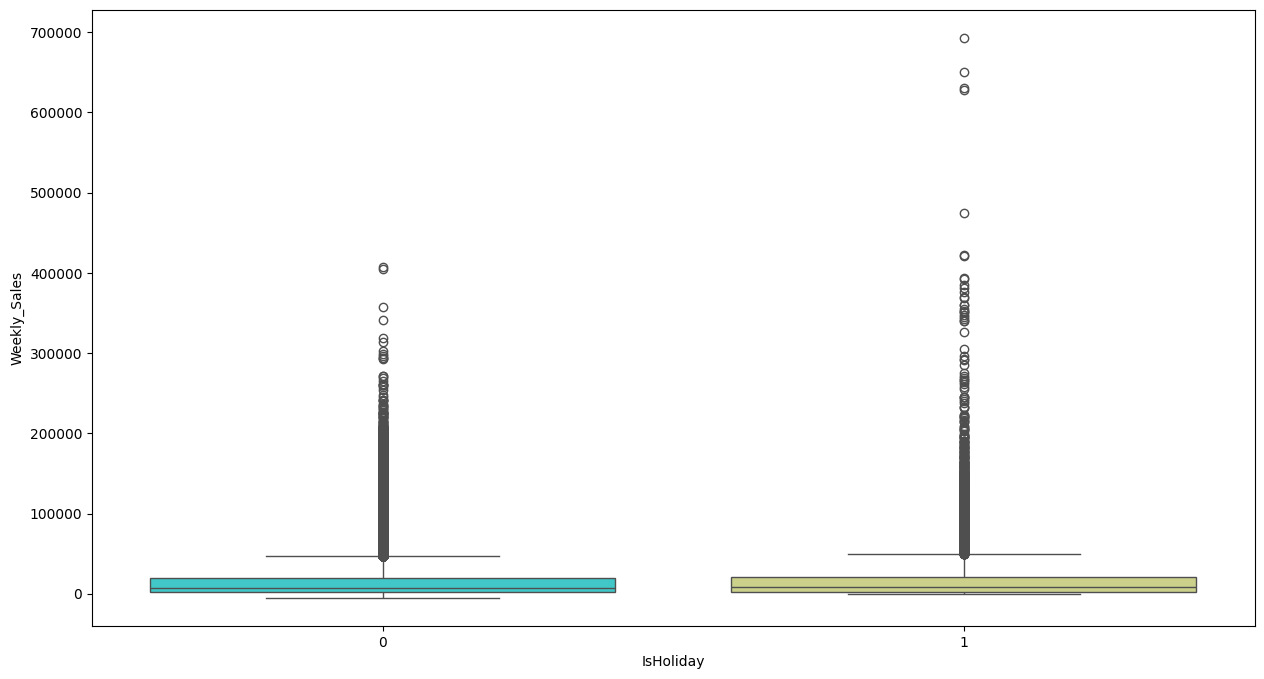

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x="IsHoliday", y = "Weekly_Sales",data = df, palette = "rainbow")
plt.show()

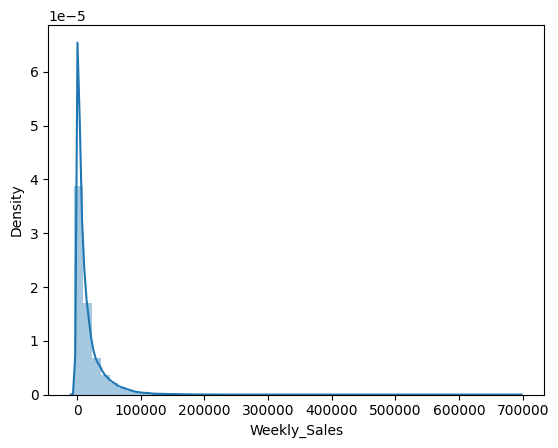

In [ ]:
sns.distplot(df['Weekly_Sales'])
plt.show()

In [ ]:
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010


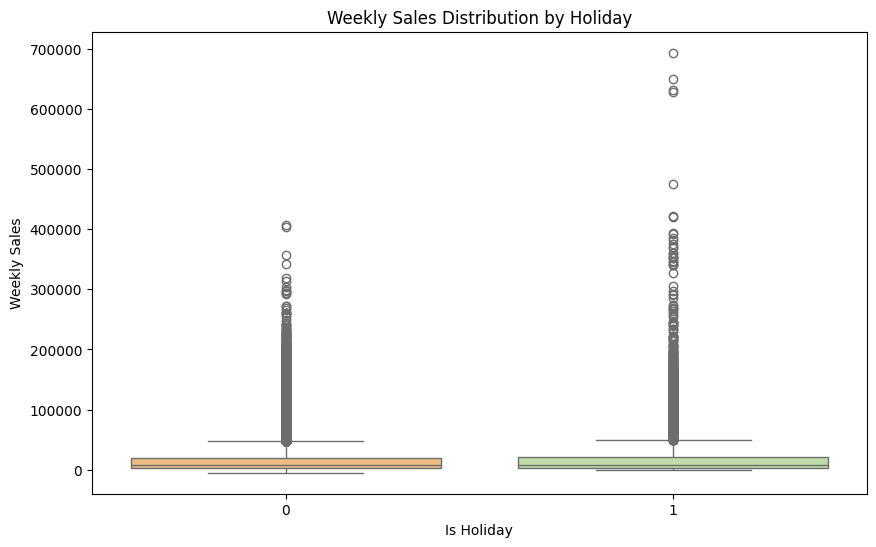

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df,palette = "Spectral")
plt.title('Weekly Sales Distribution by Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.show()

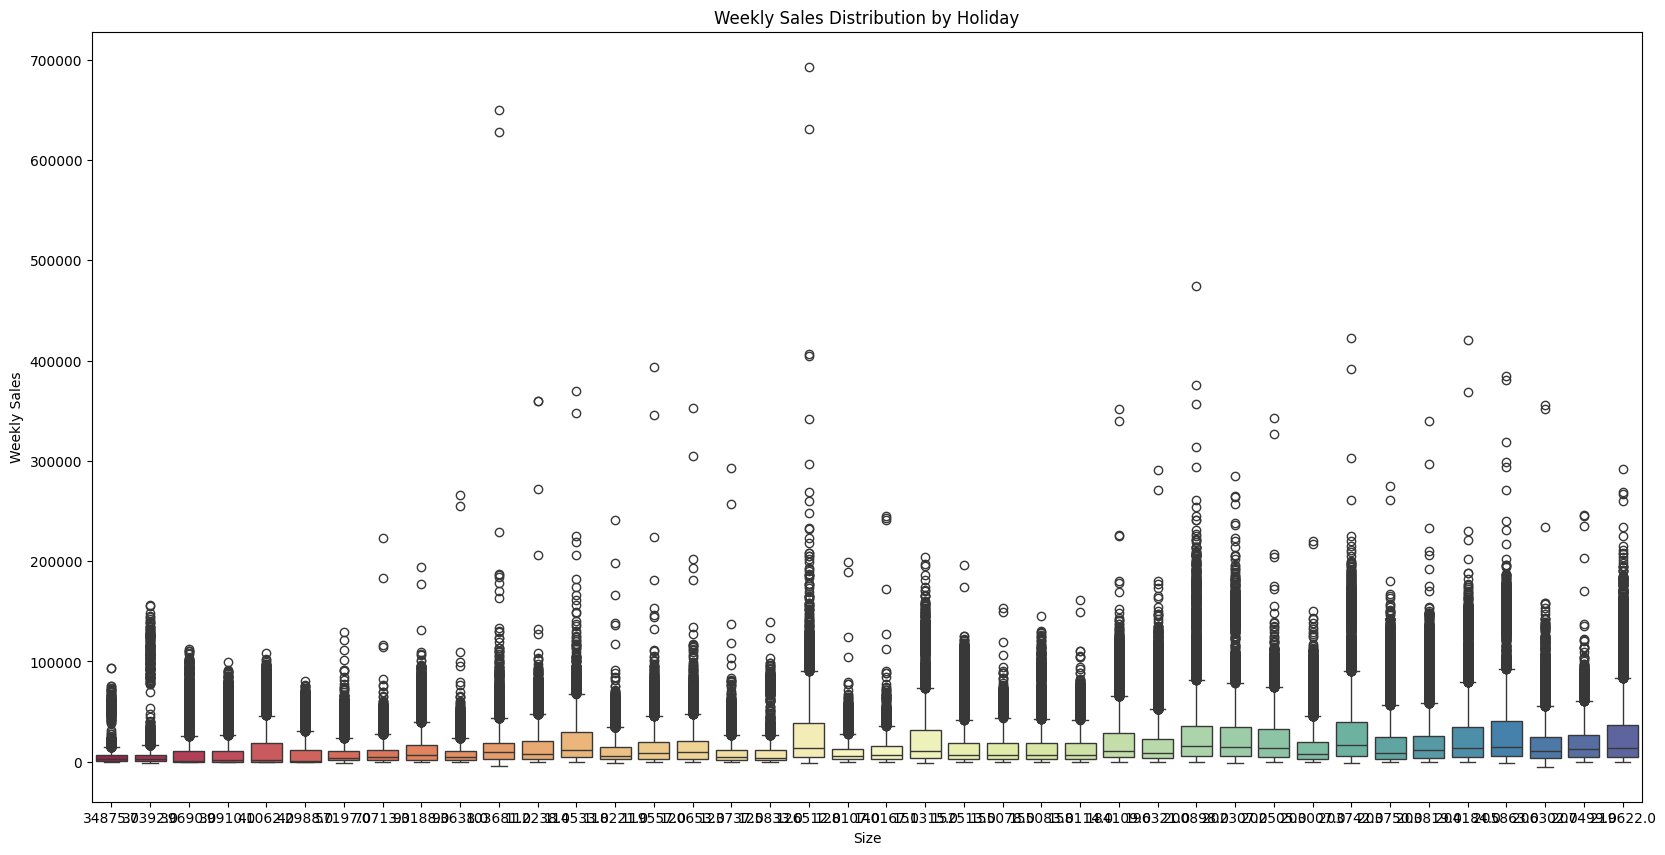

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Size', y='Weekly_Sales', data=df,palette = "Spectral")
plt.title('Weekly Sales Distribution by Holiday')
plt.xlabel('Size')
plt.ylabel('Weekly Sales')
plt.show()

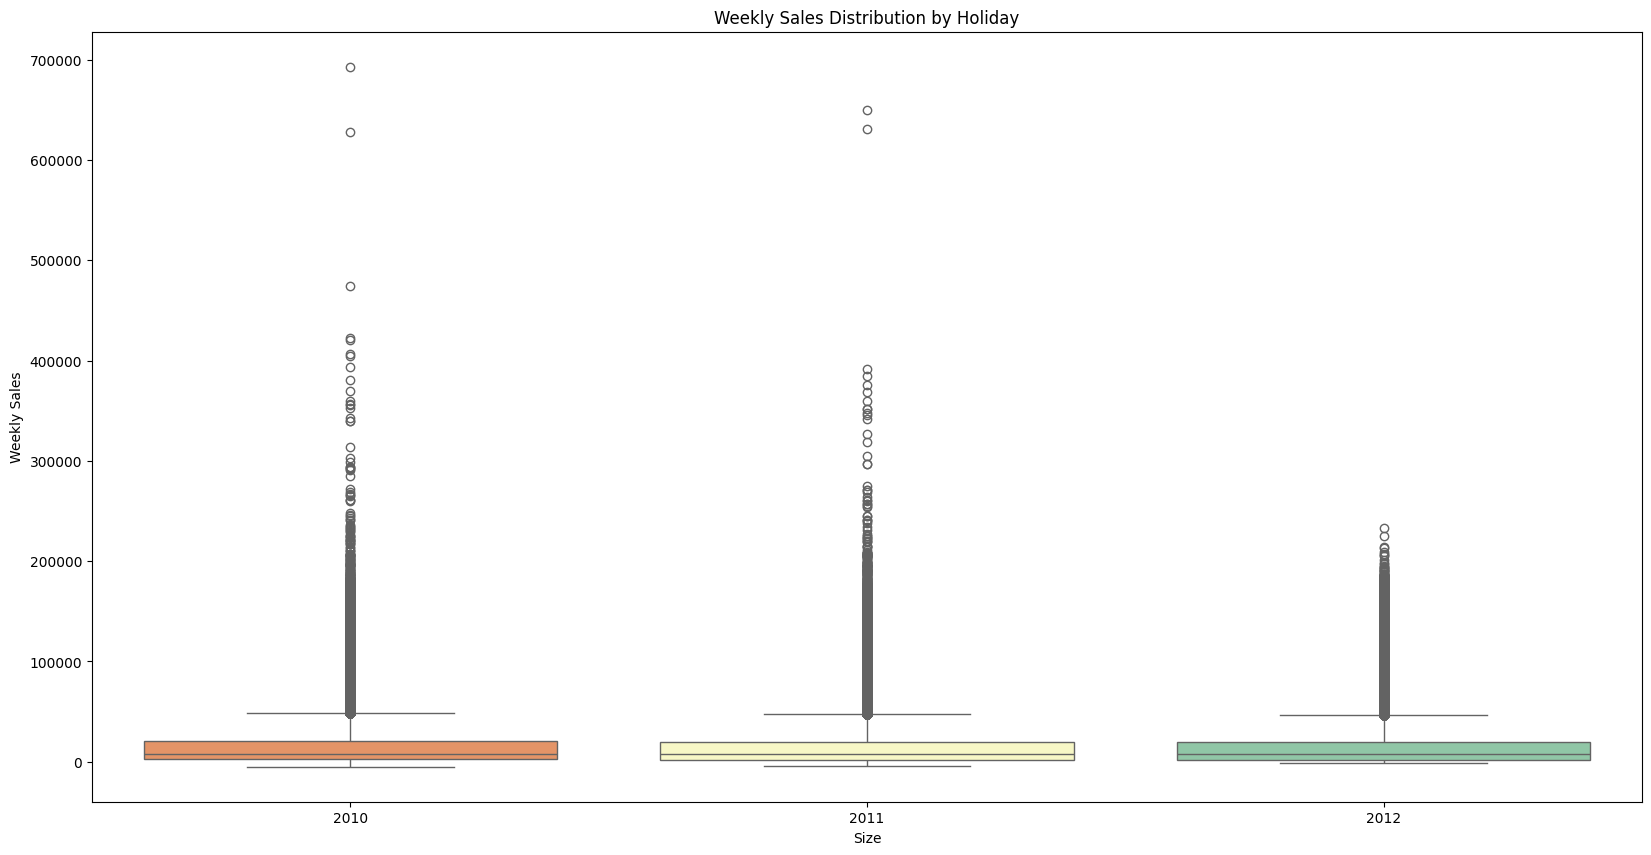

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Year', y='Weekly_Sales', data=df,palette = "Spectral")
plt.title('Weekly Sales Distribution by Holiday')
plt.xlabel('Size')
plt.ylabel('Weekly Sales')
plt.show()

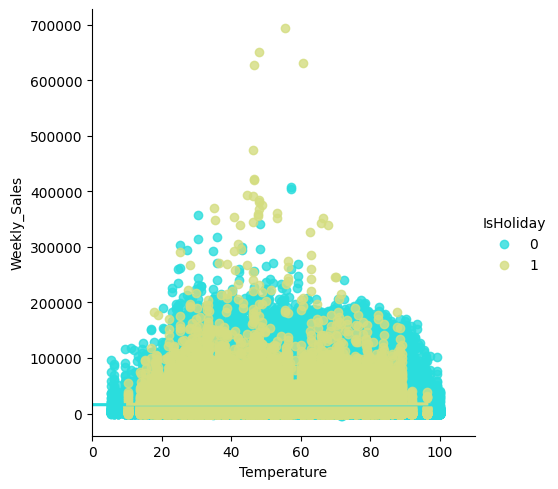

In [ ]:
graph = sns.lmplot(x = 'Temperature', y = 'Weekly_Sales', data = df, hue = 'IsHoliday', palette = 'rainbow')
graph.set(xlim = (0,110))
plt.show()

In [ ]:
['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(z:
    graph = sns.FacetGrid(df[numeric_var], hue = "target", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()

    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)

    plt.tight_layout()
    plt.show()

In [ ]:




























































































df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010


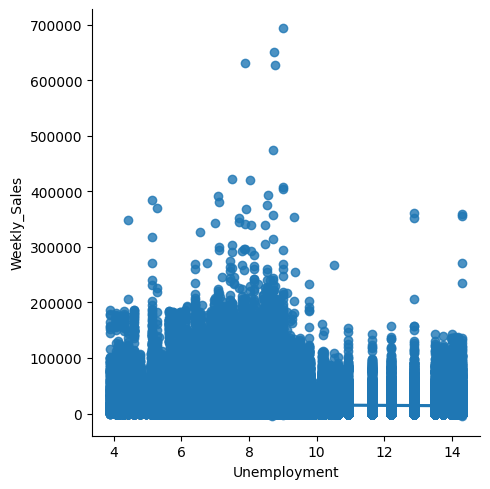

In [ ]:
sns.lmplot(x = 'Unemployment', y = 'Weekly_Sales', data = df2, palette = 'rainbow')
plt.show()

In [ ]:
# df.Fuel_Price	.unique()

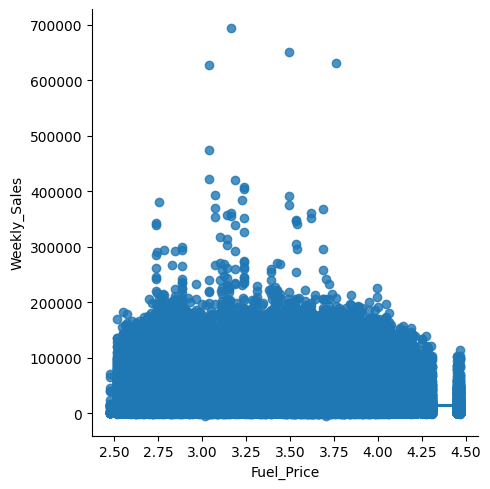

In [ ]:
sns.lmplot(x ='Fuel_Price', y = 'Weekly_Sales', data = df, palette = 'rainbow')
plt.show()